# Introduction to Scikit-Learn and Model Evaluation

## Goal: To learn how to build and evaluate binary classification models using scikit-learn

In [1]:
#Setup
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

df = pd.read_csv('/home/joseph/python_projects/Chapter_1_cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [2]:
#Positive class: default payment next month = 1
#Negative class: default payment next month = 0
#Binary Classification model needed

df['default payment next month'].mean()

0.2217971797179718

In [3]:
df.groupby('default payment next month')['ID'].count() #Group by ID

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [4]:
#Time to use sklearn
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [5]:
#Good practice to list all the default options when using sklearn
my_new_lr = LogisticRegression(penalty='l2', dual=False,tol=0.0001, C=1.0,fit_intercept=True,\
intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,\
multi_class='auto',verbose=0, warm_start=False,n_jobs=None, l1_ratio=None)

my_new_lr

LogisticRegression()

In [6]:
#Example of how to make changes
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [7]:
#Supervised learning needs labeled data - make X variable and Y response variable

X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [8]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
#Fit the Logistic Regression
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [10]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [11]:
#Making Predictions
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

### Generating Synthetic Data

In [13]:
#Setup
from numpy.random import default_rng
rg = default_rng(12345)
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

Text(0, 0.5, 'y')

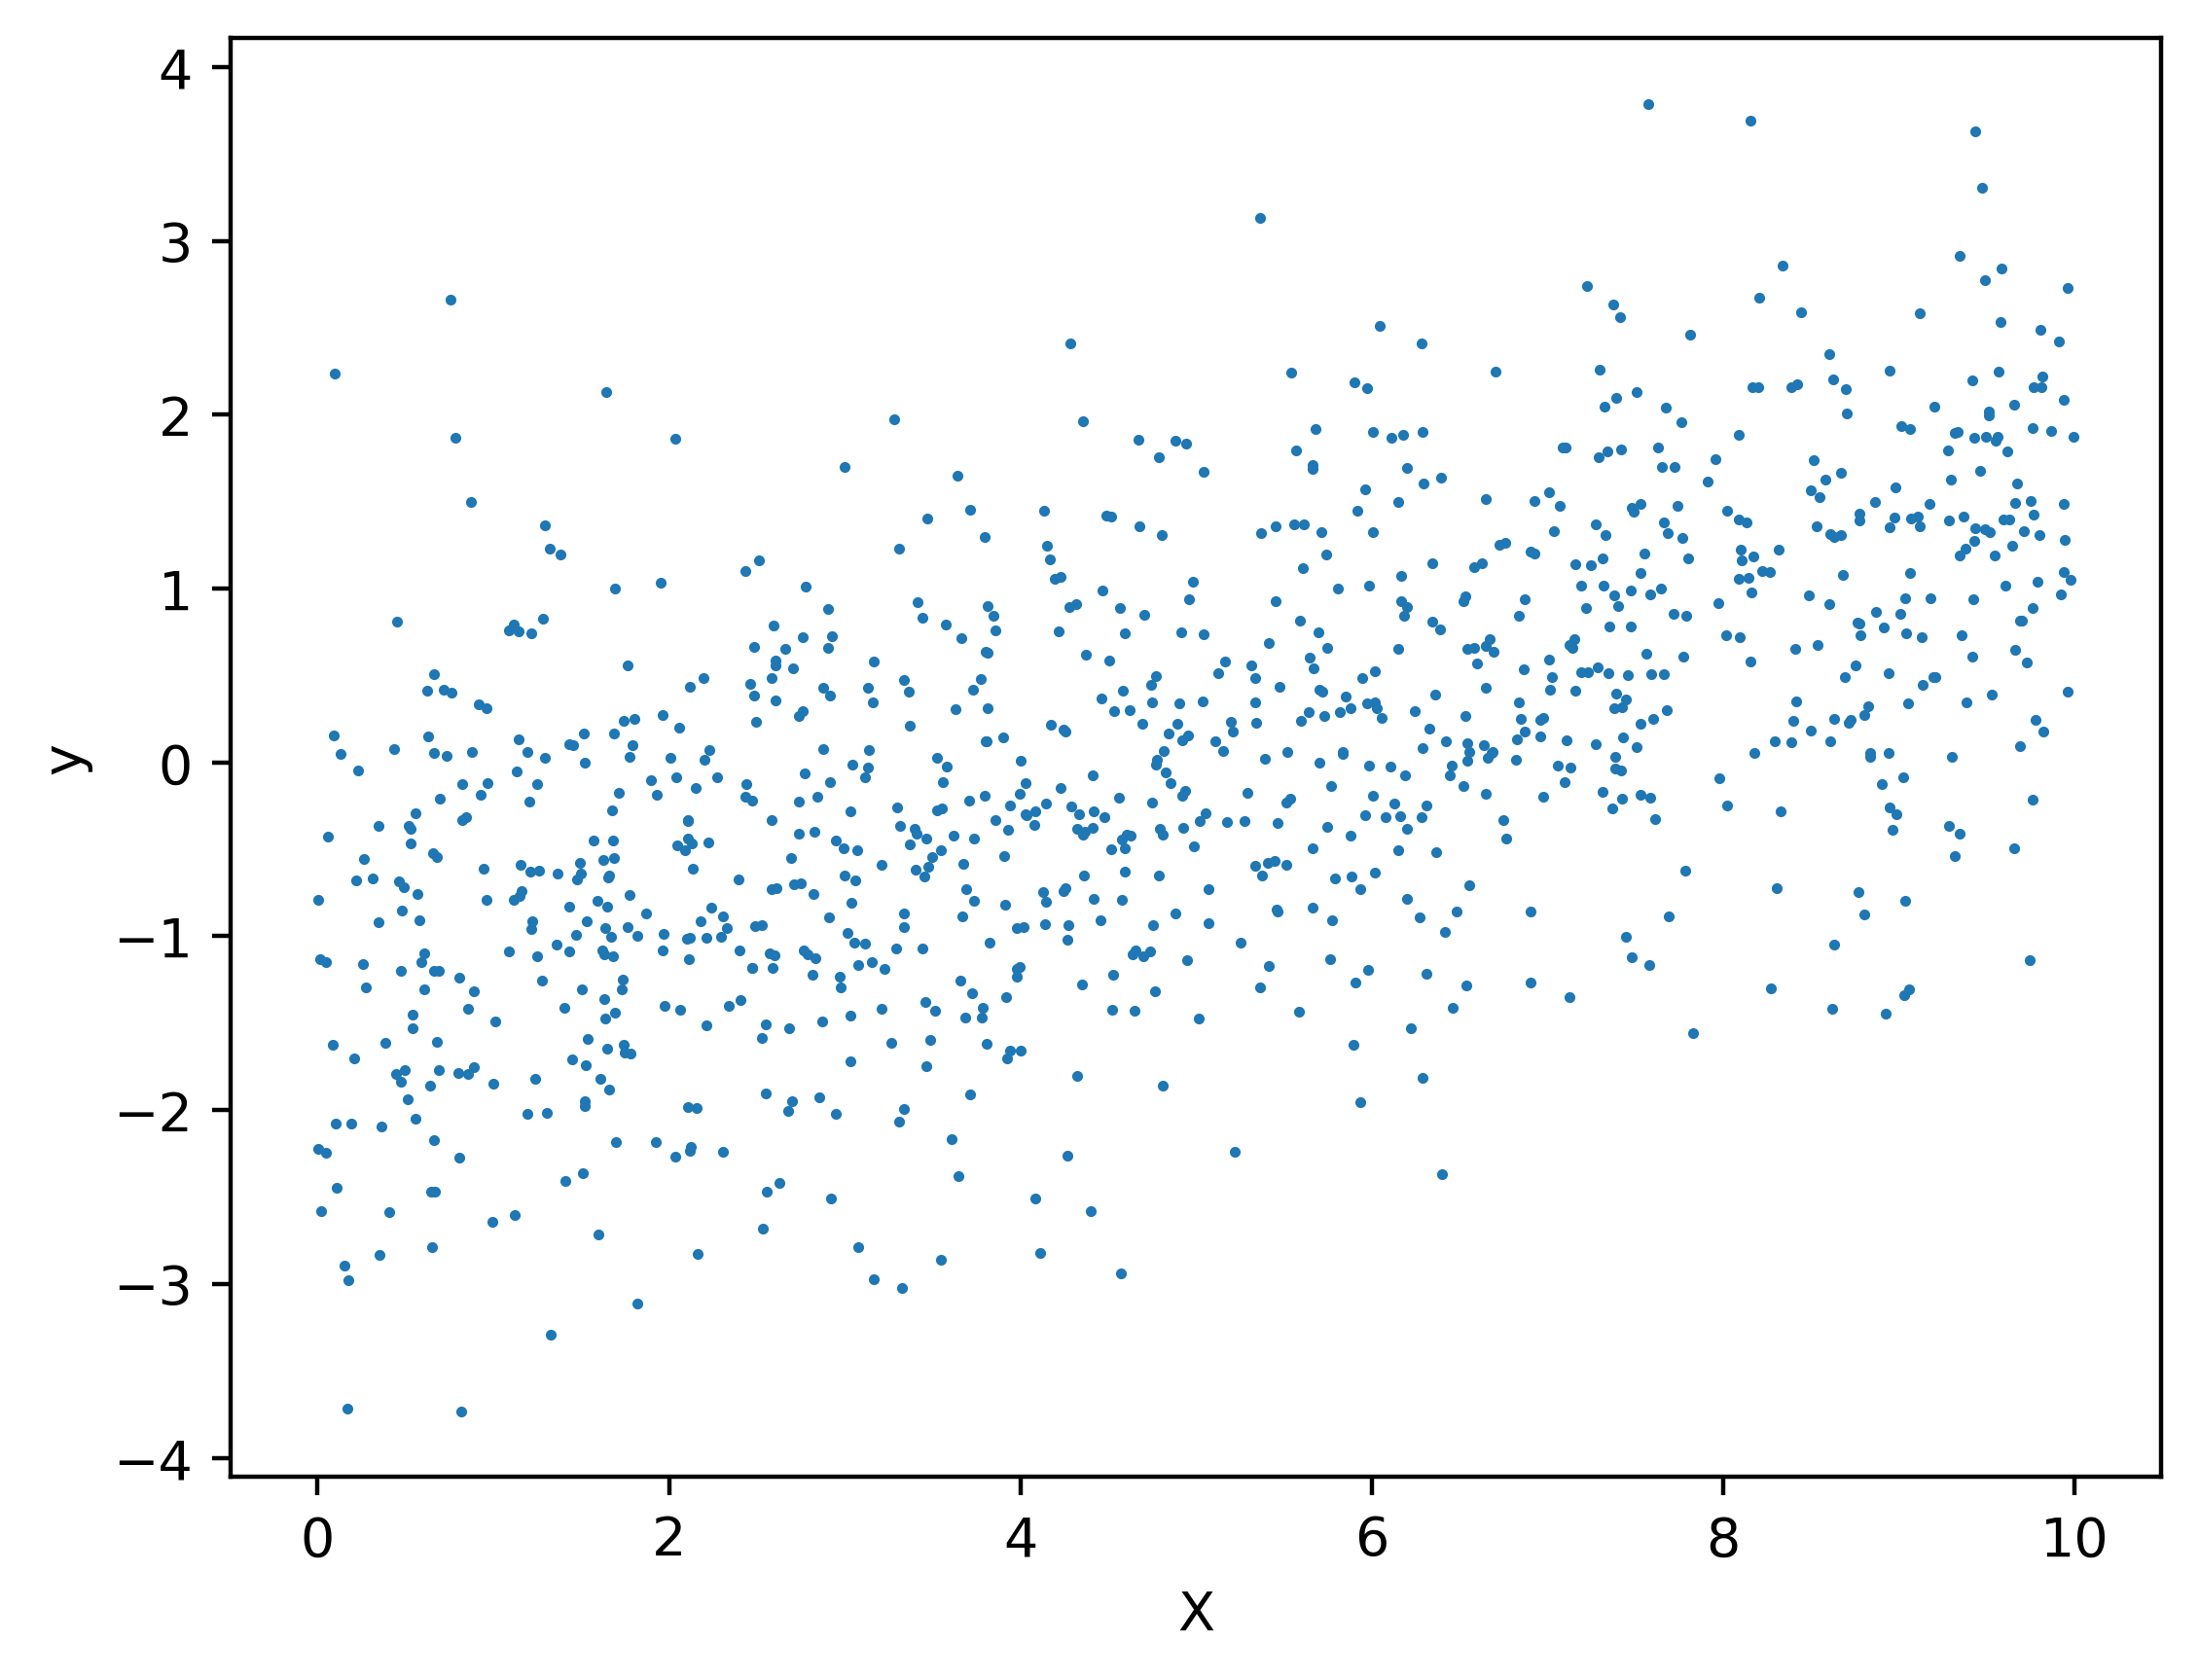

In [14]:
slope = 0.25
intercept = -1.25
y = slope * X + rg.normal(loc=0.0, scale=1.0, size=(1000,))\
+ intercept 

#Produces noisy linear data with the formula y = ax+b+N(u,o)

mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y')

### Linear Regression in scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, normalize=False,copy_X=True, n_jobs=None) #default options
lin_reg

LinearRegression(normalize=False)

In [16]:
#Fit model and establish coefficients
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

/home/joseph/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


-1.2522197212675905
[0.25711689]


In [17]:
y_predict = lin_reg.predict(X.reshape(-1,1)) #make predictions

Text(0, 0.5, 'y')

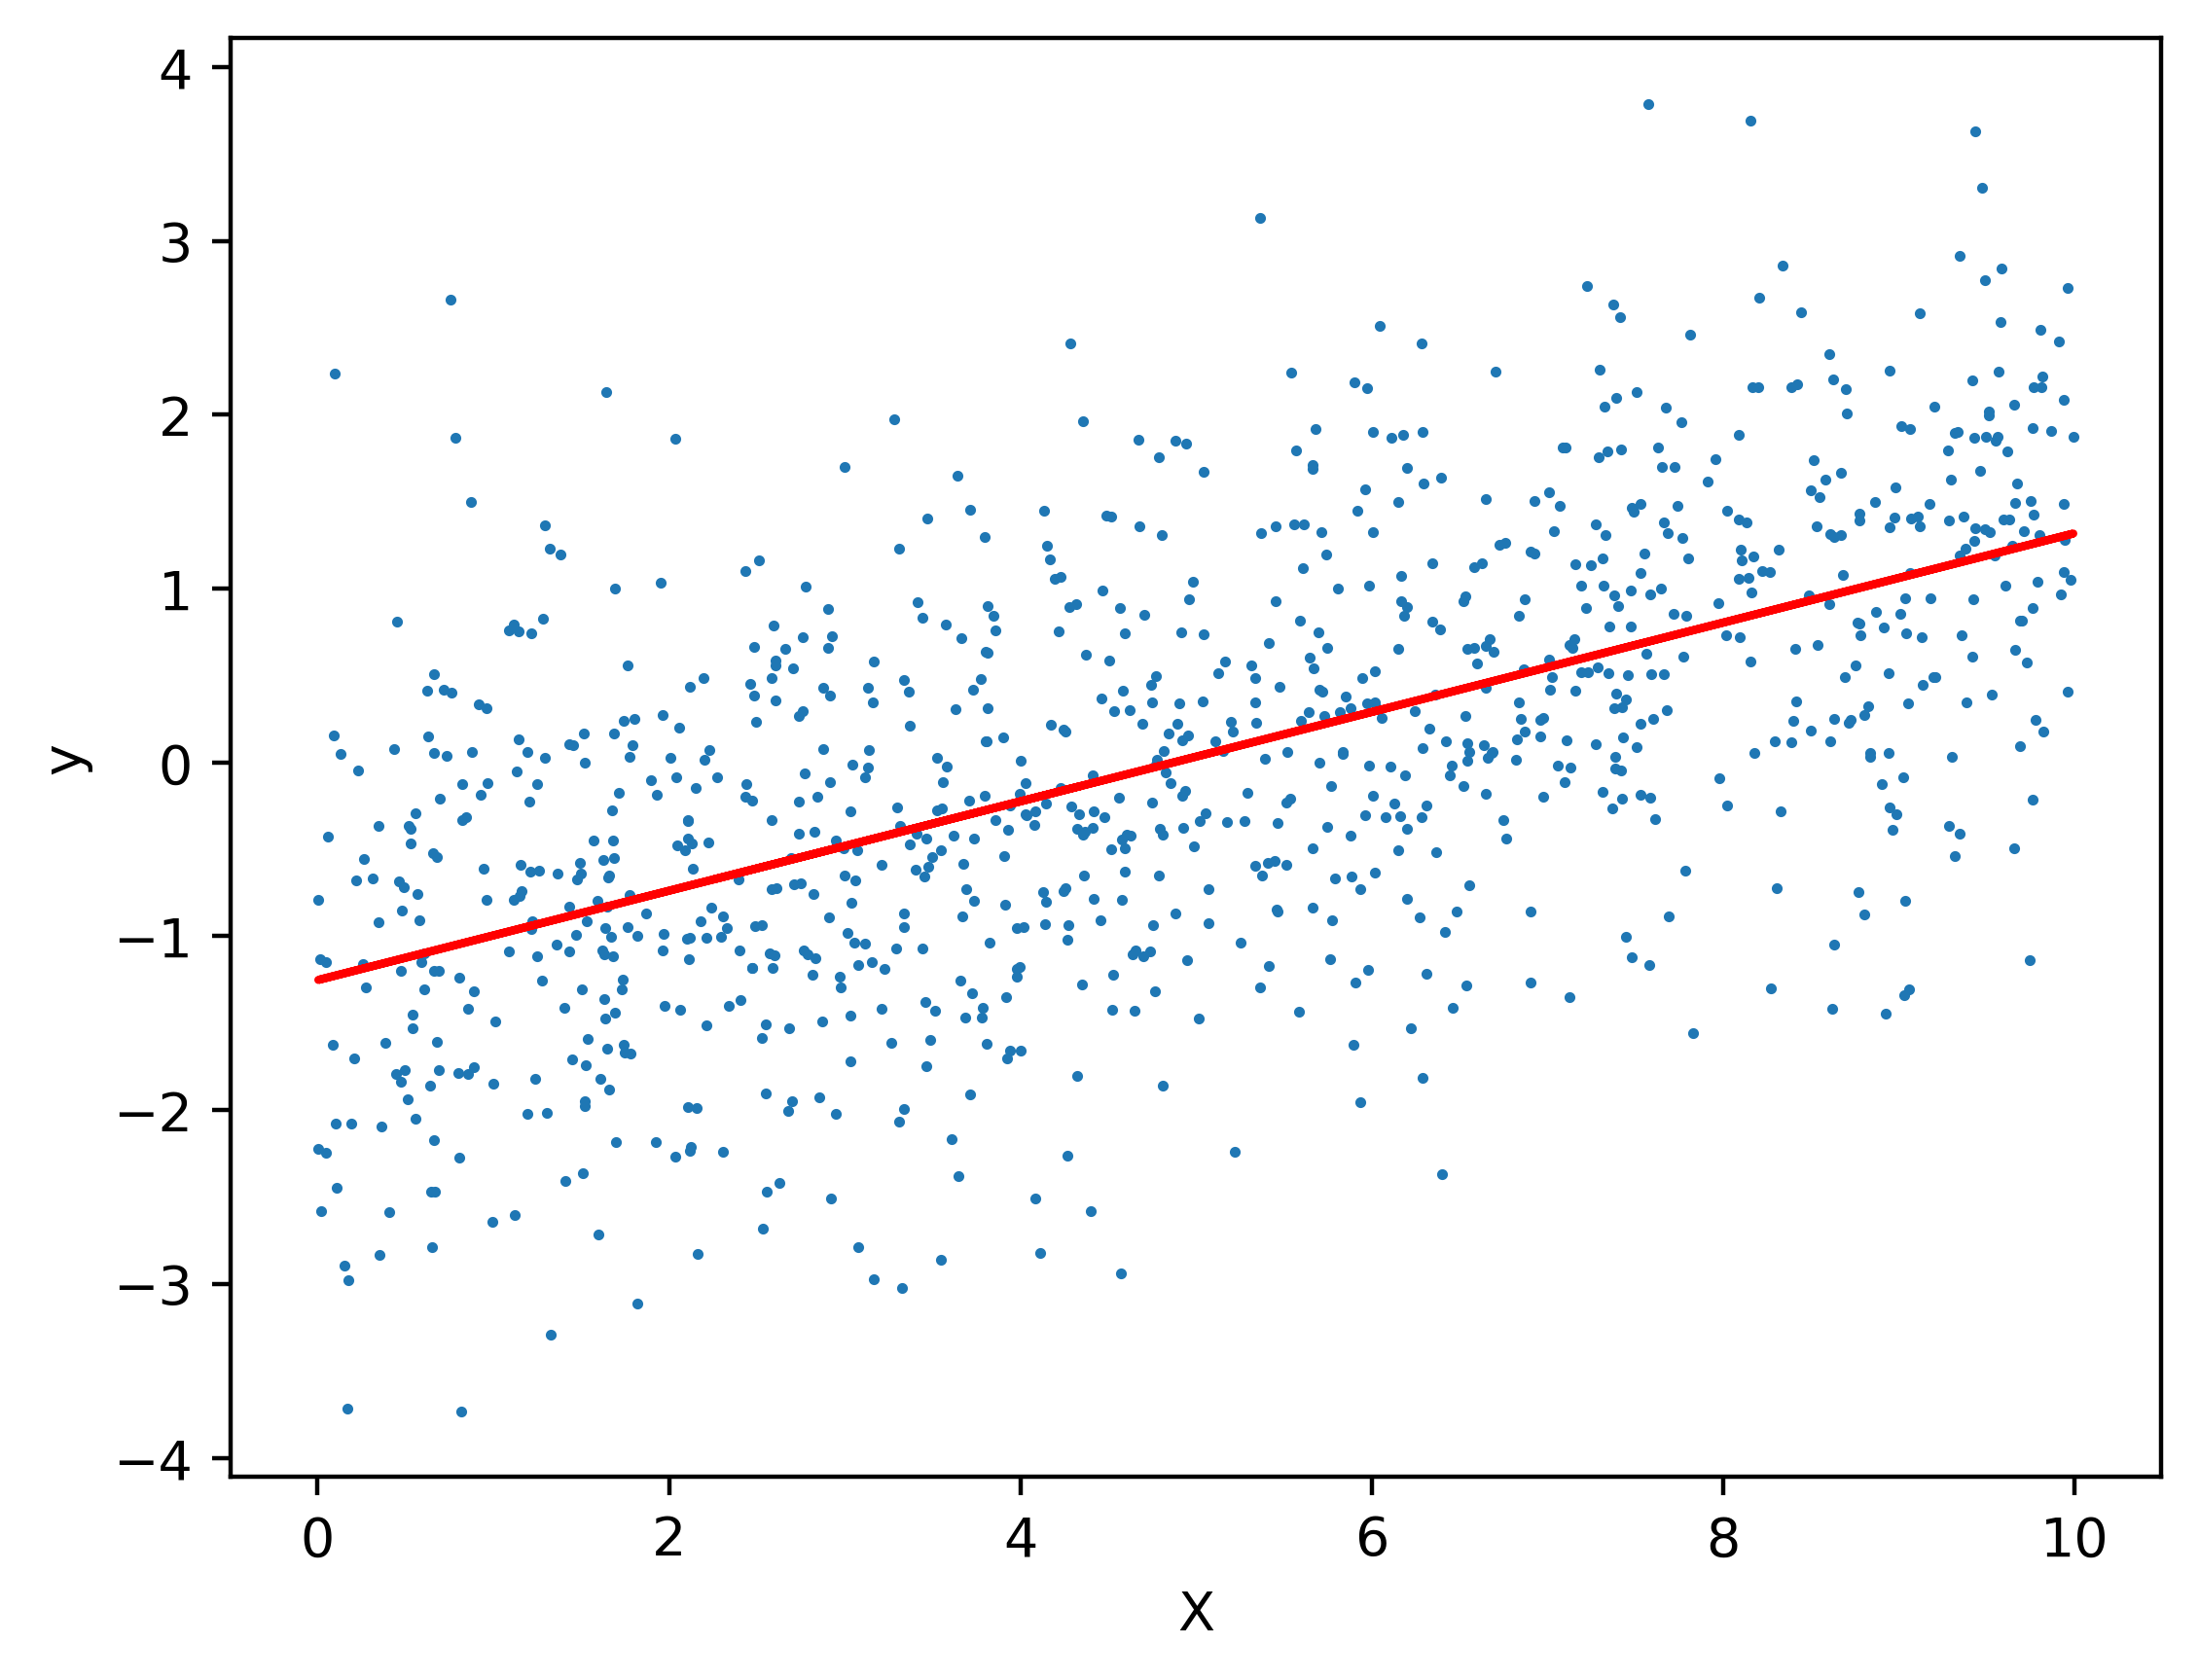

In [18]:
#Plot Predictions y_predict against X as a line over the scatter plot above
plt.scatter(X,y,s=1)
plt.plot(X,y_predict,'r')
plt.xlabel('X')
plt.ylabel('y')

### Line of Best Fit: Complete!

## Model Performance Metrics for Binary Classification

#### Before we start making predictive models in earnest, we want to know how to determine if a model we've made is "good" in some sense of the word. This is where model performance metrics come in. There are two things to keep in mind when selecting a model performance metric:

#### - The appropriateness of the metric for a given problem

#### - And whether or not the metric matches the business question

In [19]:
#Test/Train split - typically 20%/80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),df['default payment'\
' next month'].values, test_size=0.2,random_state=24)

In [20]:
#Classification Accuracy
from sklearn.linear_model import LogisticRegression


example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [21]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [22]:
y_pred = example_lr.predict(X_test)

In [23]:
#Calculate Accuracy
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

#### Model is correct 78.34% of the time

In [24]:
#Confirm with other methods
example_lr.score(X_test, y_test) #score method

0.7834239639977498

In [25]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred) #metrics method

0.7834239639977498

#### The numbers match, as they should

## True Positive Rates, False Positive Rates, and Confusion Matrix

TPR = TP/P -> True Positive Rate = True Positives/Positives

FNR = FN/P -> False Negative Rate = False Negatives/Positives

TPR + FNR = 1 -> Relation between TPR and FNR 

--------------------------------------------------------------------------------------------------------------------

TNR = TN/N -> True Negative Rate = True Negatives/Negatives

FPR = FP/N -> False Positive Rate = False Positives/Negatives

TNR + FPR = 1 -> Relation between TNR and FPR

--------------------------------------------------------------------------------------------------------------------
#### True and false positives and negatives can be summarized in a confusion matrix. For a binary classification problem, this is a 2x2 matrix with the true class on one axis and the predicted class on the other. It summarizes how many true and false positives and negatives there are.

In [26]:
P = sum(y_test) # Positive Samples
P

1155

In [27]:
TP = sum( (y_test==1) & (y_pred==1)) #True Positives
TP

0

In [28]:
TPR = TP/P #True Positive Rate
TPR

0.0

In [30]:
FN = sum( (y_test==1) & (y_pred==0)) #False Negatives
FN

1155

In [32]:
FNR = FN/P #False Negative Rate
FNR 

1.0

In [33]:
N = sum(y_test==0) # Negative Samples
N

4178

In [34]:
TN = sum( (y_test==0) & (y_pred==0)) #True Negatives
TN

4178

In [35]:
FP = sum( (y_test==0) & (y_pred==1)) #False Positives
FP

0

In [36]:
TNR = TN/N
FPR = FP/N

print("The true negative rate is {} and the false positive rate is {}".format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


We have learned that our model acts exactly like the majority-class null model for all samples, both positive and negative. We need a better model.

In [39]:
#Confusion Matrix - Scikit-learn version
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

## Discovering Predicted Probabilities: How does Logistic Regression Make Predictions?

So far, Logistic Regression has only been treated as a "black box" thta can learn from labeled training data and make binary predictions on new features. Let's take a peek inside the black box.

An important thing to consider is that the predictions from logistic regression are not binary labels - they're probabilities on a scale of 0 to 1. They're transformed to binary predictions through the use of a threshold. A threshold is the quantity that decides whether a prediction is negative or positive. In scikit-learn, the threshold is 0.5. Values below 0.5 are negative and all other values are positive. However, we can pick any threshold we want. This is one of the key flexibilities of logistic regression and other ML algorithms that estimate probabilities of class ownership.

### Obtaining Predicted Probabilities from a Trained Logistic Regression Model

We can begin to discover predicted probabilities further by examining the methods availiable to us when we use the logistic regression model. Recall that once we trained the model, we could make binary predictions by passing these values to the *.predict* method of the trained model, which are made on the assumption of a threshold of 0.5.

We can directly access the predicted probabilities by using the *predict_proba* method.

In [41]:
y_pred_proba = example_lr.predict_proba(X_test) #predicted probabilities
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [42]:
prob_sum = np.sum(y_pred_proba,1) #sum of predicted probabilities
prob_sum 

array([1., 1., 1., ..., 1., 1., 1.])

In [43]:
np.unique(prob_sum) #checking if each value in the array is 1

array([1.])

After confirming our belief in the predicted probabilities, we note that since
class probabilities sum to 1, it's sufficient to just consider the second column,
the predicted probability of positive class membership. Let's capture these in
an array.

In [44]:
pos_proba = y_pred_proba[:,1] #predicted probability of membership in positive class
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

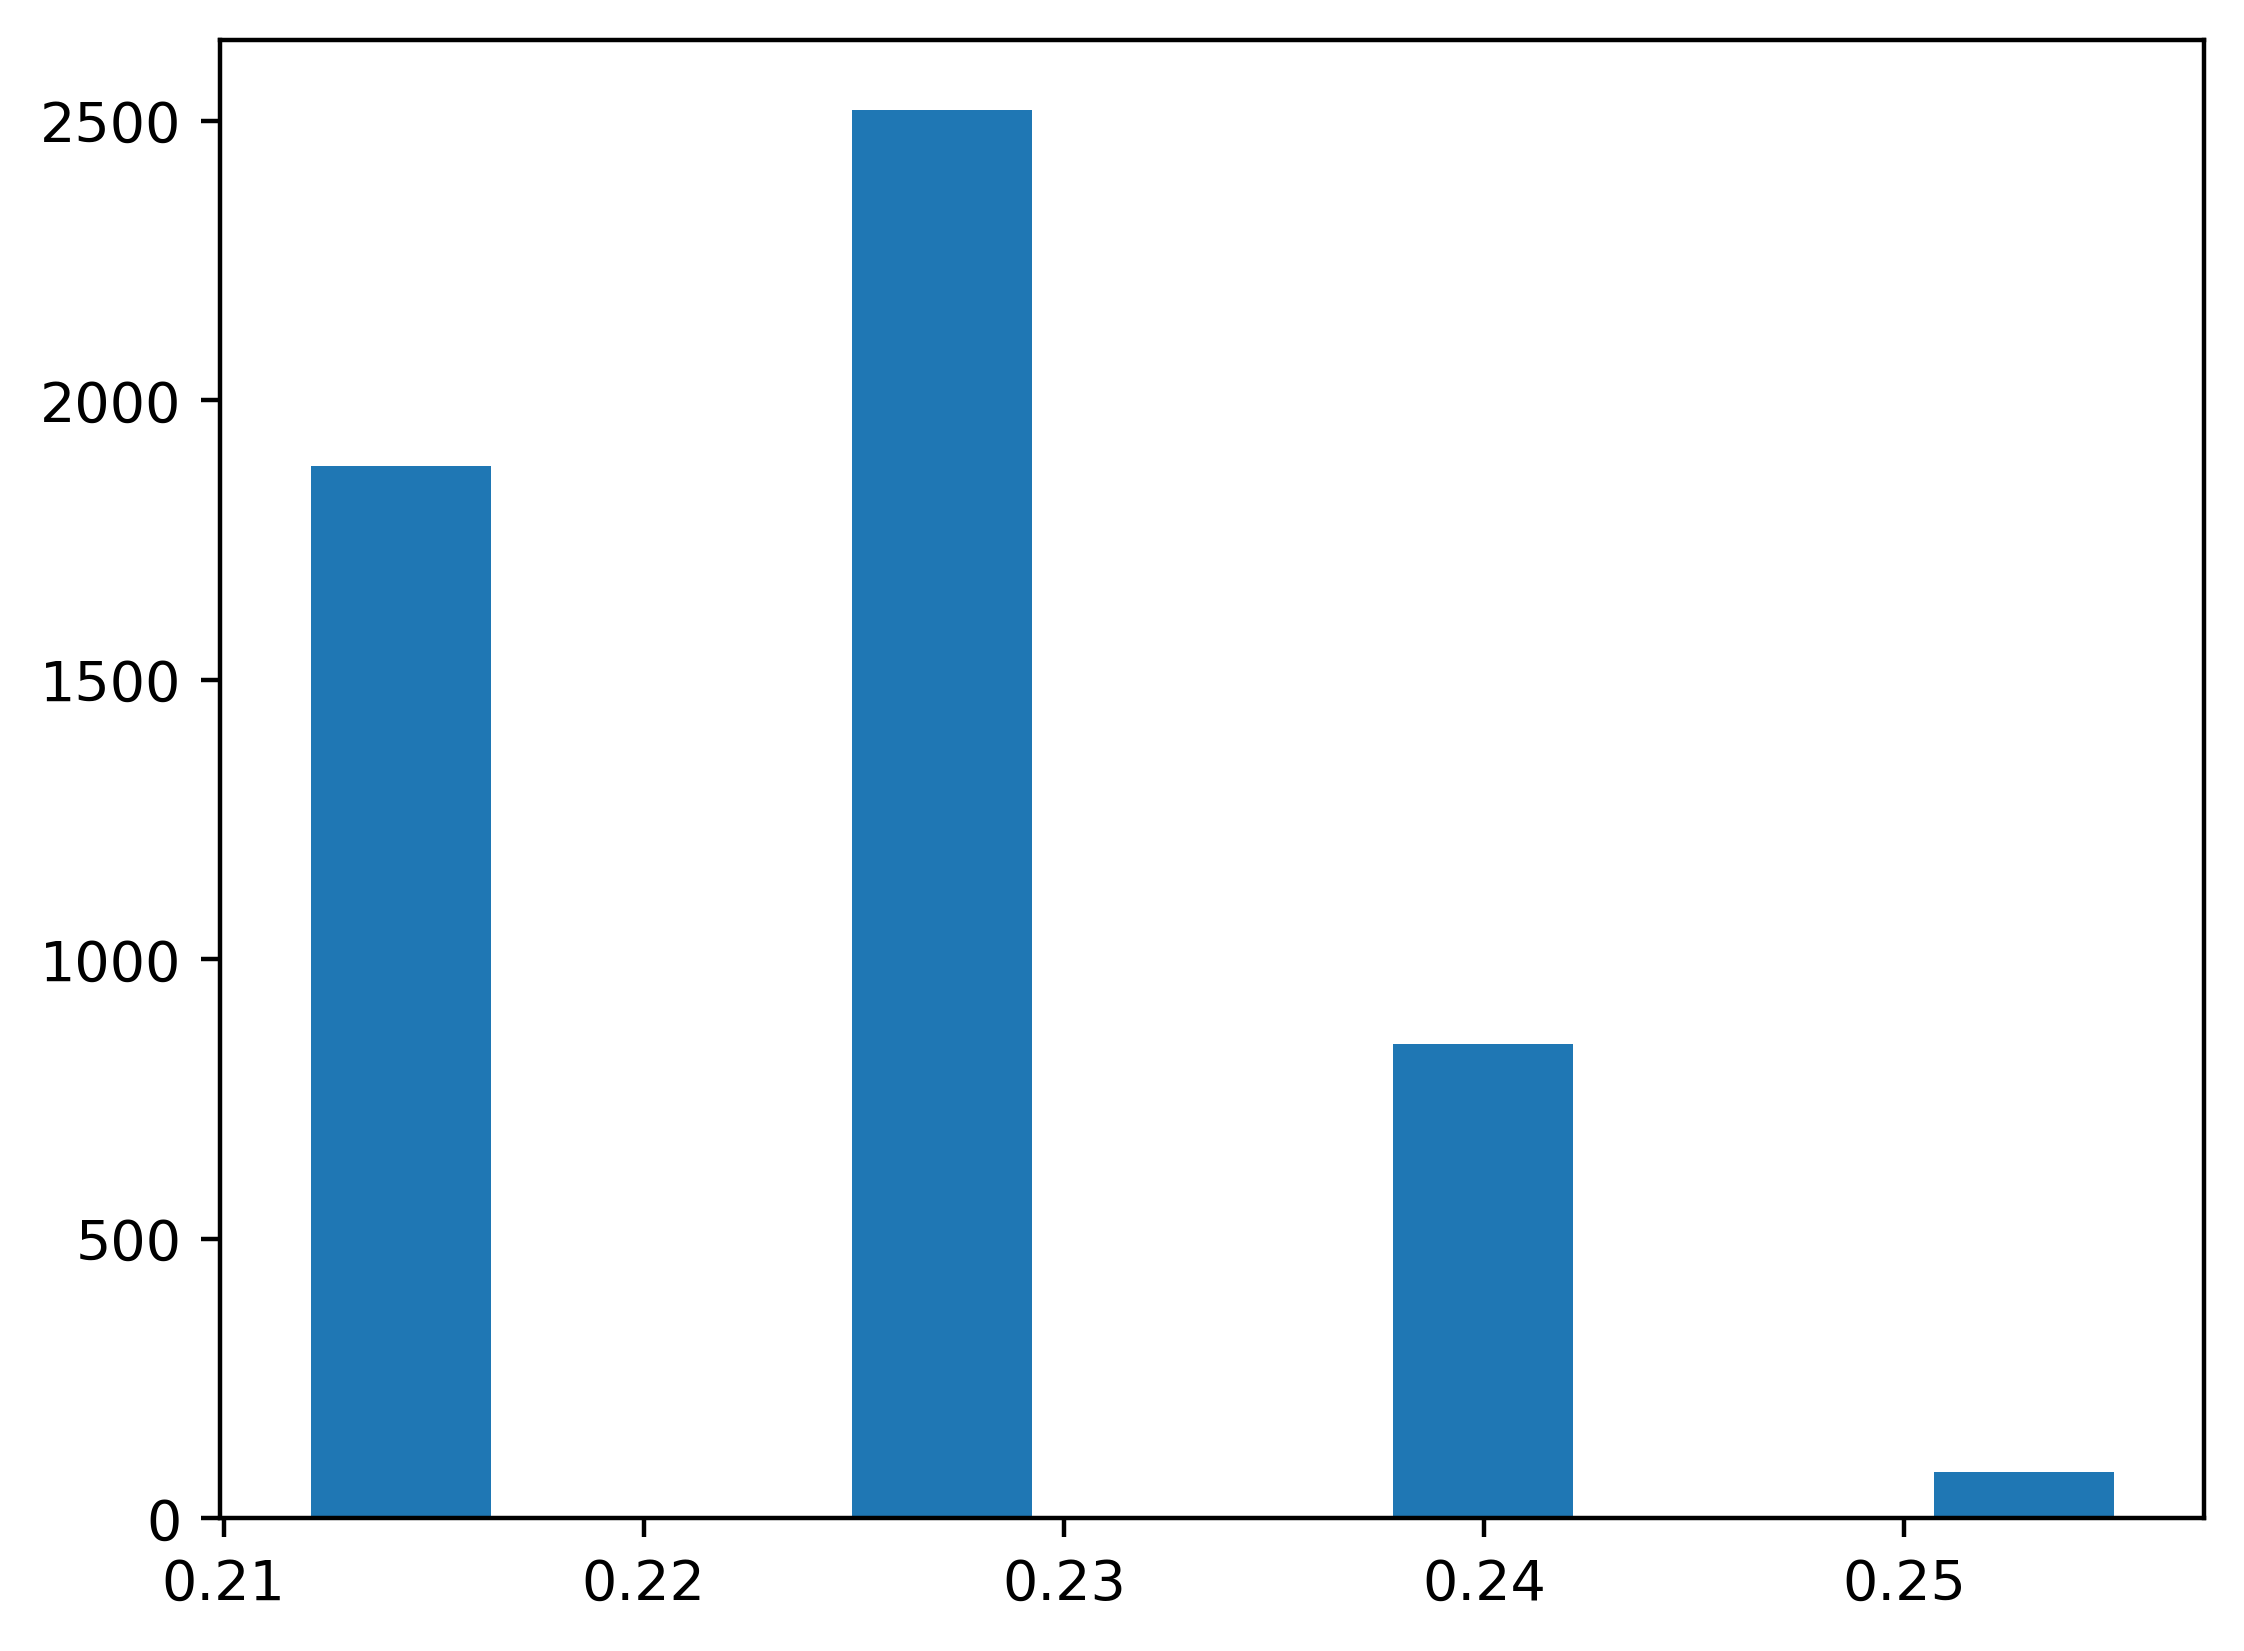

In [45]:
#Unformatted Histogram to show what the predicted probability of membership in positive class looks like
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

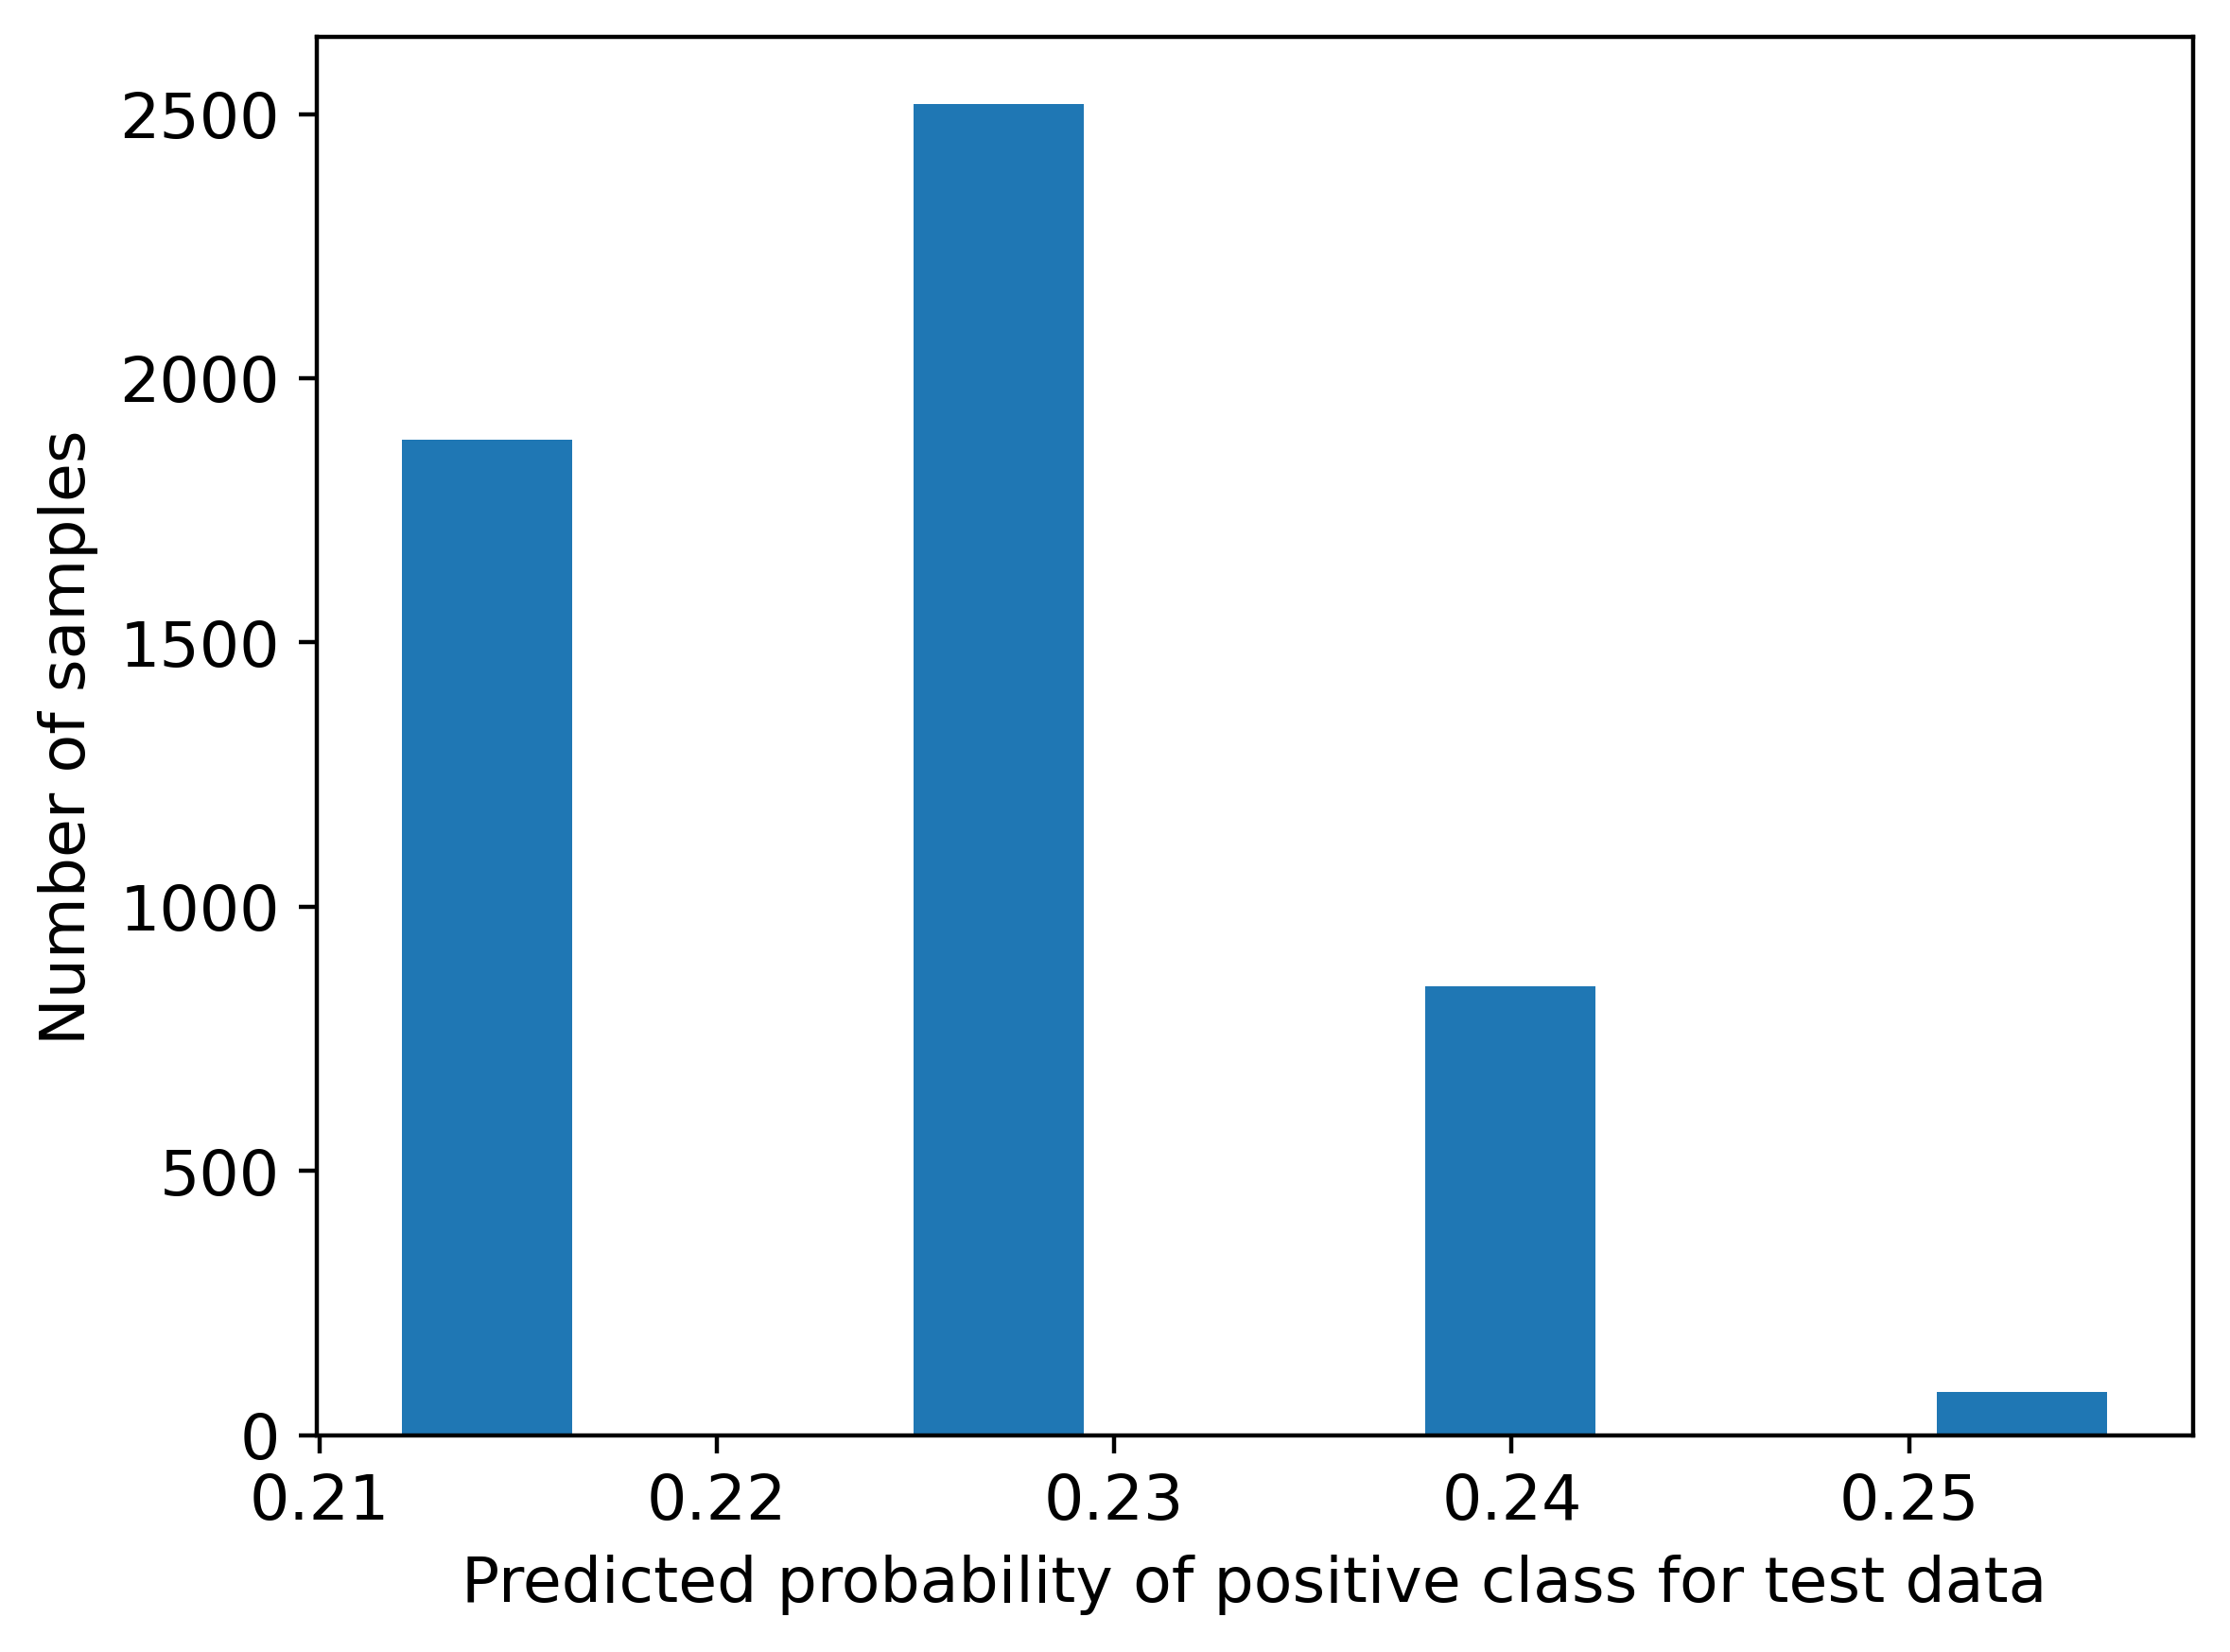

In [48]:
#Formatted Histogram
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Number of samples')

All of these samples are below 0.5. This is why our last test did not predict them as positives. If we had set the threshold to 0.25, all of the samples to the right of the 0.25 bin would be classified as positive. To show how many of these samples actually have positive labels, we can use a stacked histogram. This will tell us if changing the threshold to 0.25 would be beneficial or not.

In [49]:
#Isolate predicted probabilities
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

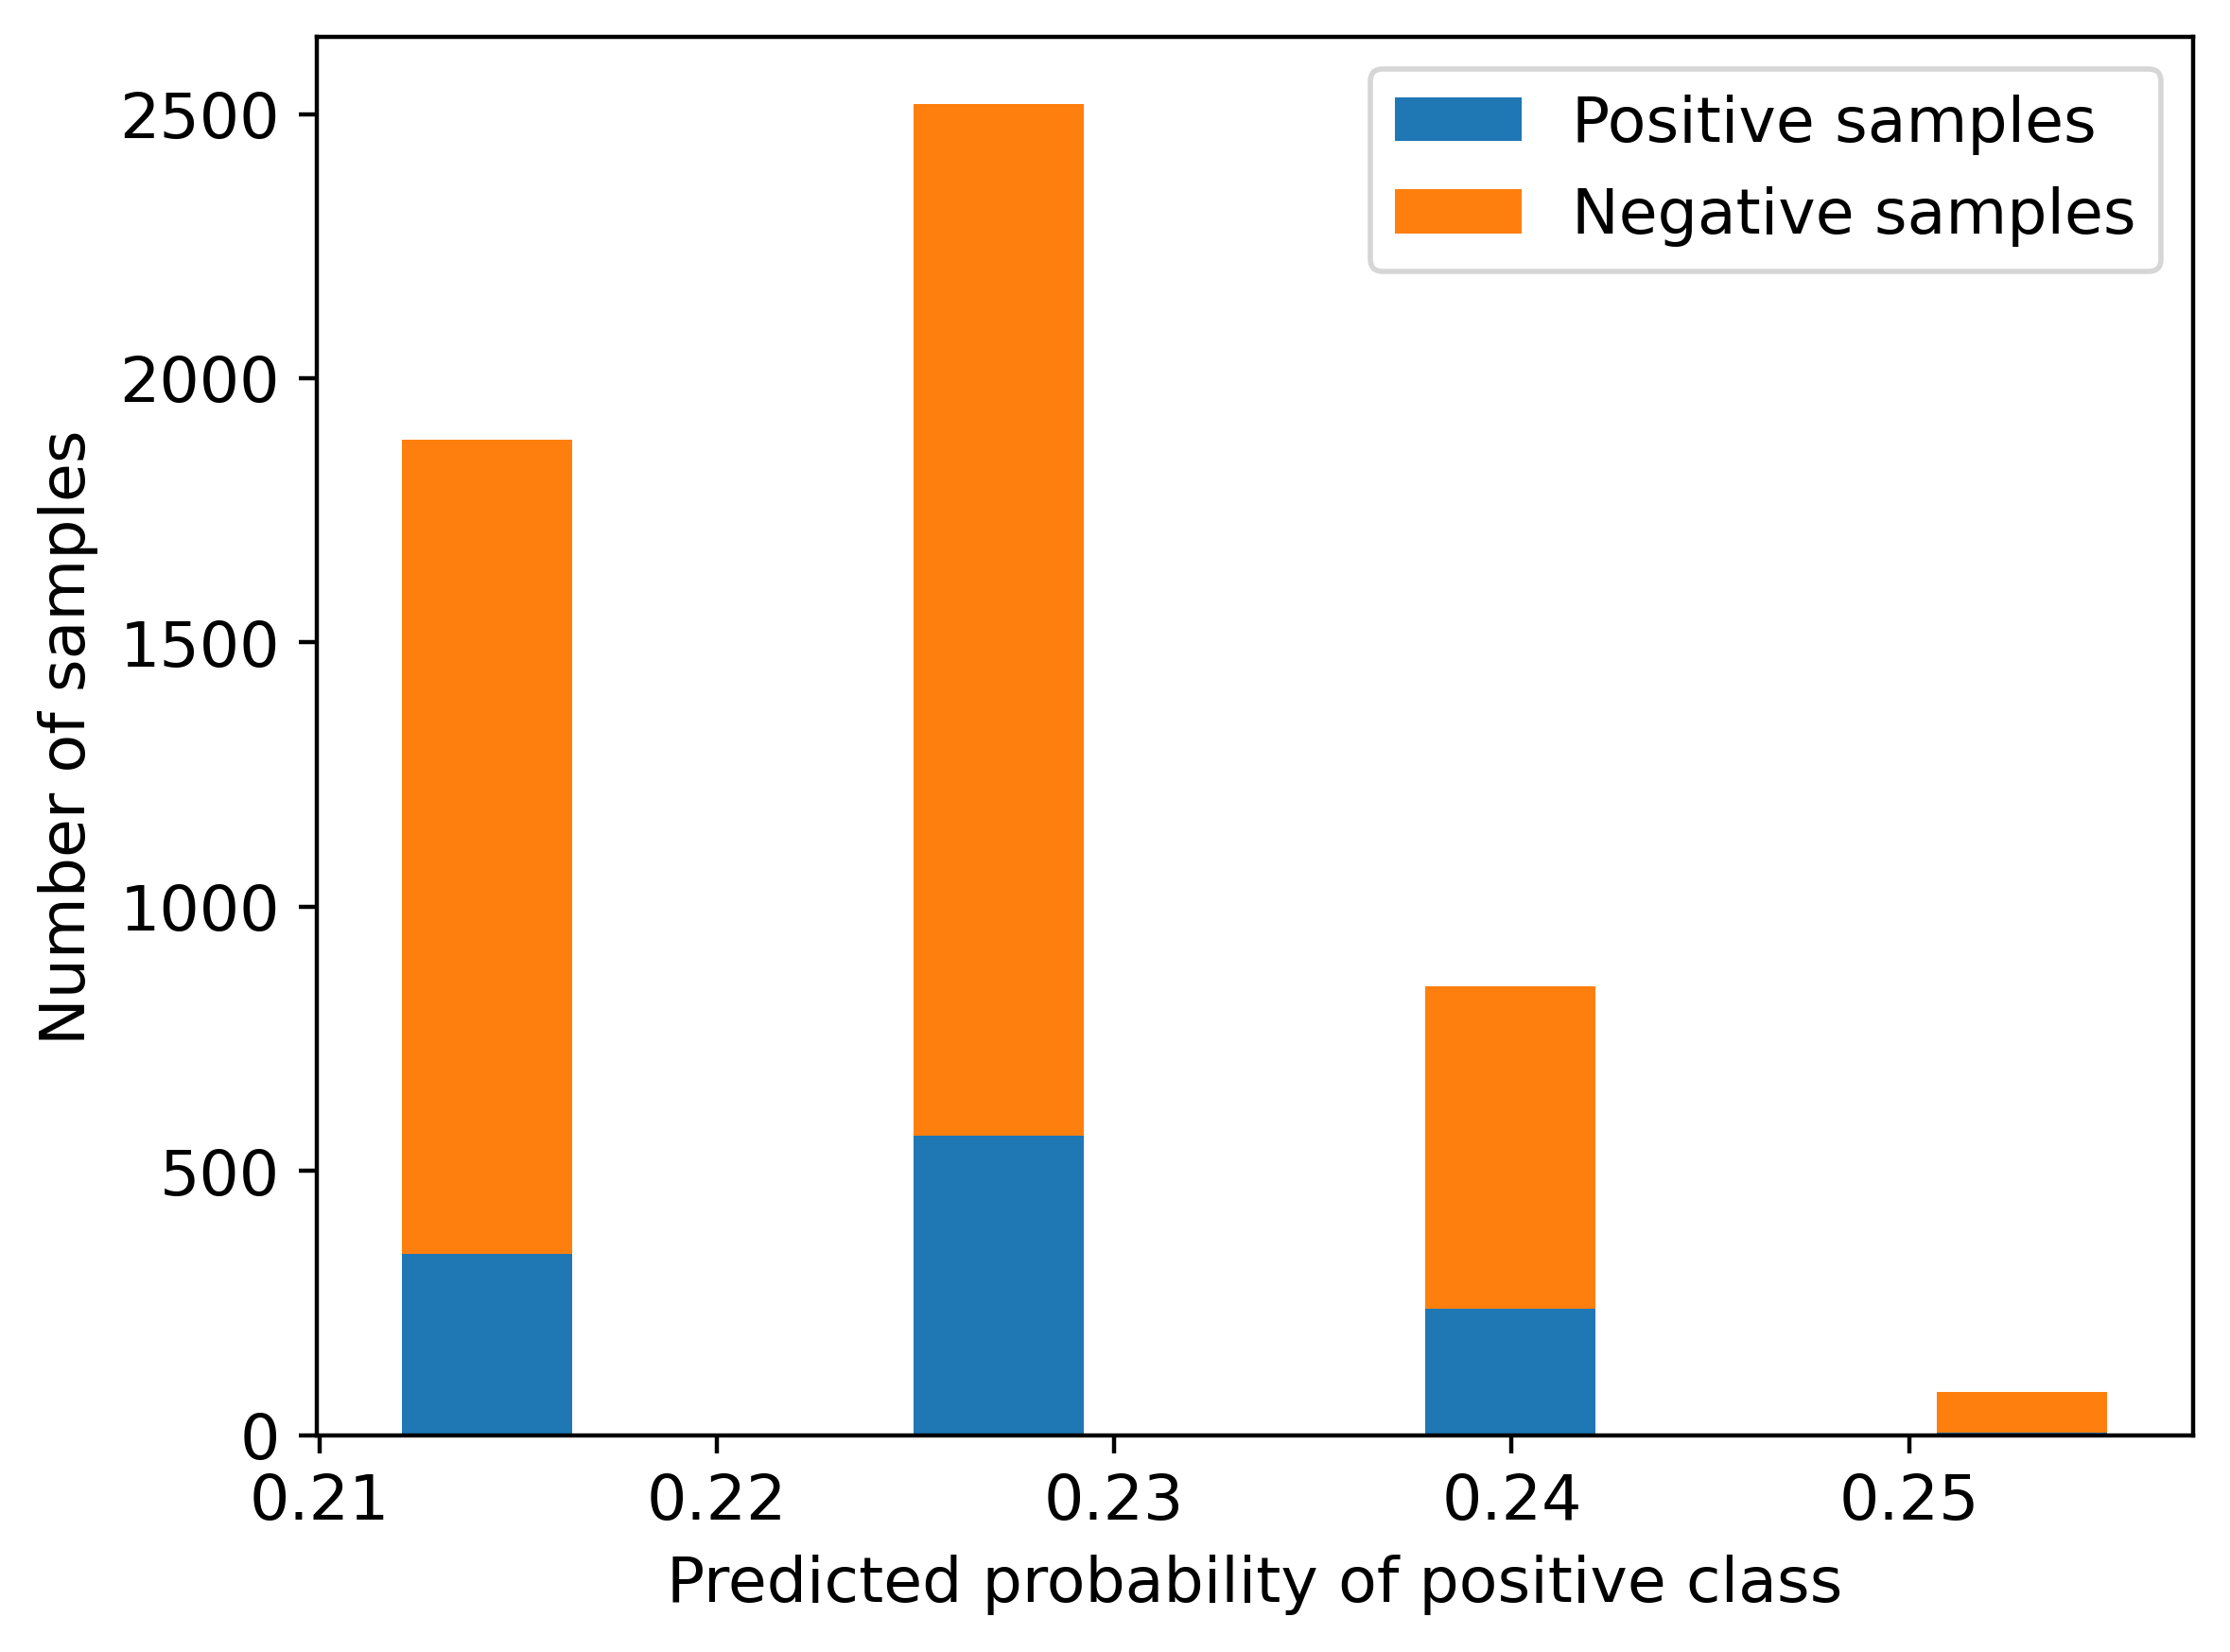

In [50]:
#Stacked histogram
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Most of the samples above are negative. All of the samples to the right of our last bin are negative. Changing the threshold to 0.25 would erroneously classify them as positive and increase our FPR. At the same time, no new positive samples would be classified correctly. This means that our TPR wouldn't change. Lowering the threshold to 0.25 in this case would appear to decrease the accuracy of the model.

## The Receiver Operating Characteristic (ROC) Curve

Finding the threshold of a classifier is the question of finding the sweet spot where we recover enough true positives without incurring too many false positives. What can help us find this sweet spot? The ROC curve can!

The ROC curve is a plot of the TPRs (x-axis) and FPRs (y-axis) that result from lowering the threshold from 1 to 0. Lowering the threshold lets us find the sweet spot, the desired threshold for our data.

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba) #ROC Curve

Text(0.5, 1.0, 'ROC curve')

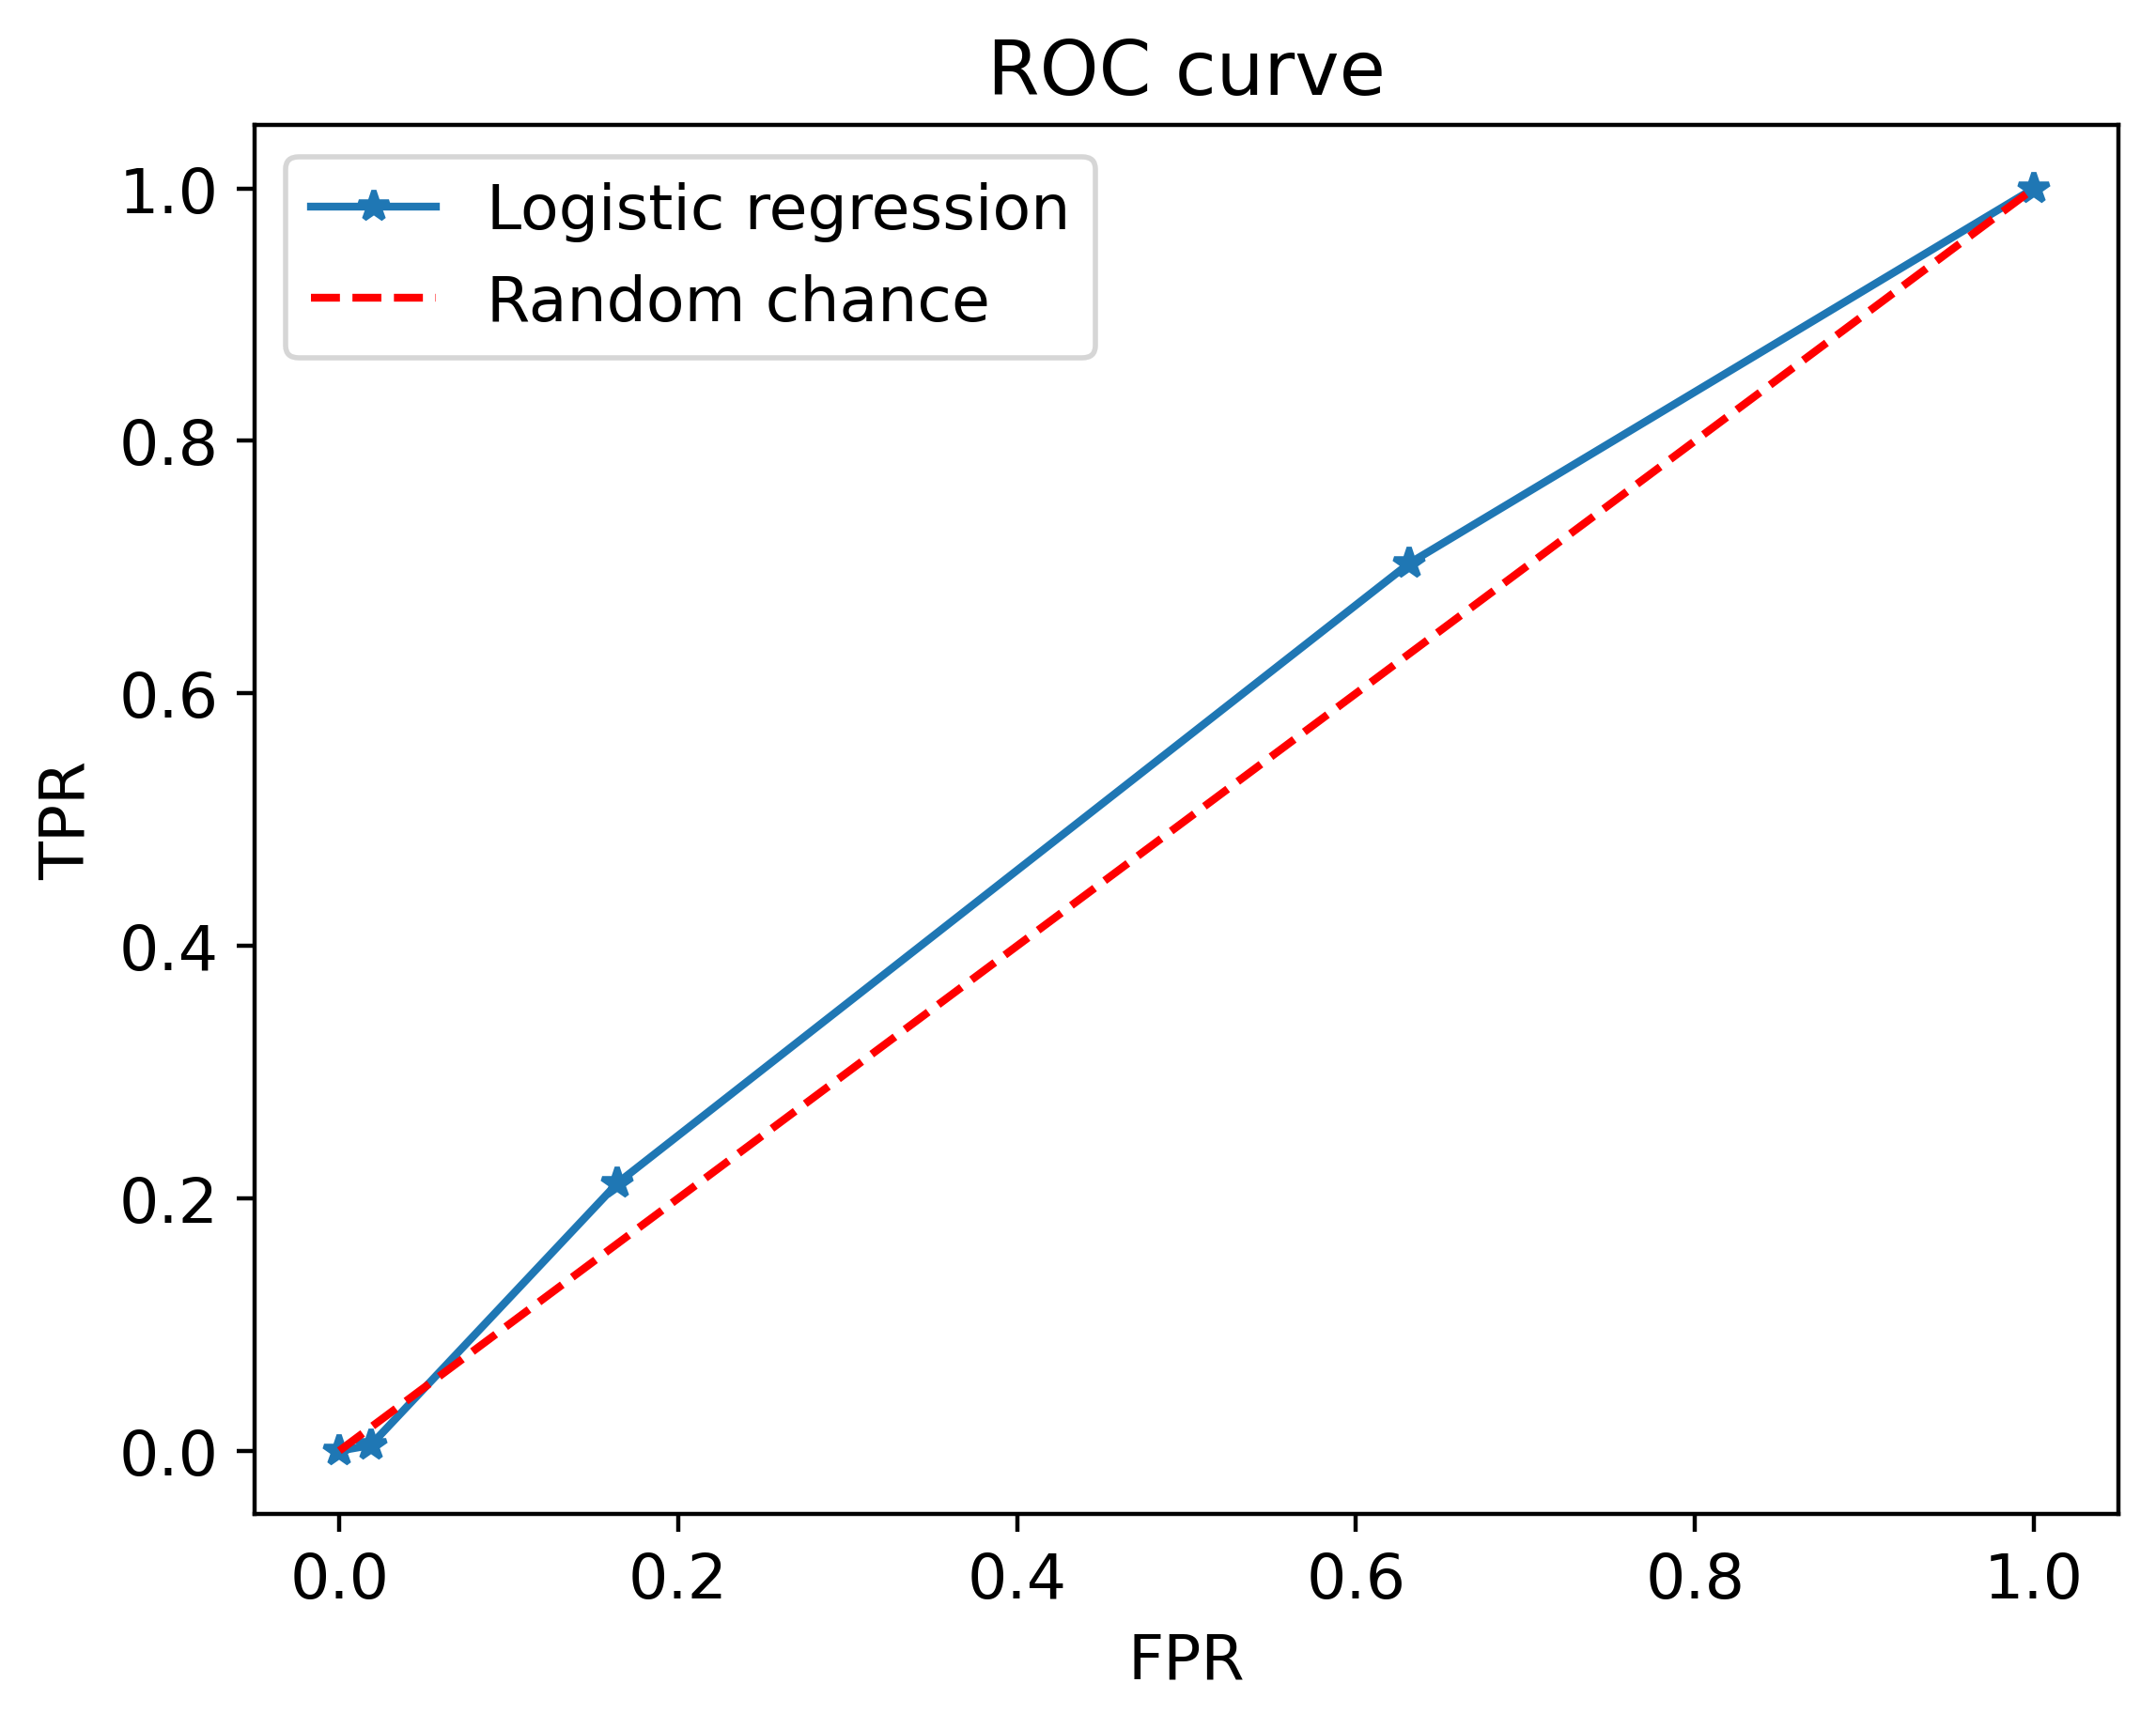

In [52]:
#Plot ROC Curves
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [53]:
thresholds #thresholds used to calculate ROC curve

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

A "good" ROC looks like this: As the threshold is lowered, we get High TPR annd a lower FPR. In general, the area under the graph (AUC) for a ROC is going to be between 0.5 and 1. The closer to 1 it is, the better it performs. This AUC is known as the ROC AUC or the C-statistic (concordance statistic)

We can calculate the ROC AUC using scikit-learn

In [54]:
metrics.roc_auc_score(y_test, pos_proba) #ROC AUC

0.5434650477972642

0.54 is close to 0.5. This means that it is not a very effective classifier. Unsurprising since we have not yet determined which features of the canididate pool are actually useful at this point. So far, we're only using a simple model containing the EDUCATION feature. By considering other features, we have a chance of getting a higher ROC AUC.

## Precision and Creating a Precision-Recall Curve

Precision is defined as follows:

Precision = TP/TP+FP -> Also known as the positive predictive value. The closer to 1, the better.

Precision and recall (TPR) can be determined by using the *metrics.precision_recall_curve* function.

Precision and recall are plotted together to assess the quality of positive predictions and to show the fraction of the positove class a model is able to identify. We shall plot a precision-recall curve soon

Precison helps lower the time cost associated with reviewing models

In [58]:
#Test-train split using LIMIT_BAL instead of EDUCATION
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),df['default payment'\
' next month'].values, test_size=0.2,random_state=24)

In [59]:
#Logistic Regression
my_lr = LogisticRegression(penalty='l2', dual=False,tol=0.0001, C=1.0,fit_intercept=True,\
intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,\
multi_class='auto',verbose=0, warm_start=False,n_jobs=None, l1_ratio=None)

In [60]:
#Fit with Logistic Regression
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [61]:
#Array of predicted probabilities
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [66]:
#ROC AUC score
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [67]:
#ROC Curve
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

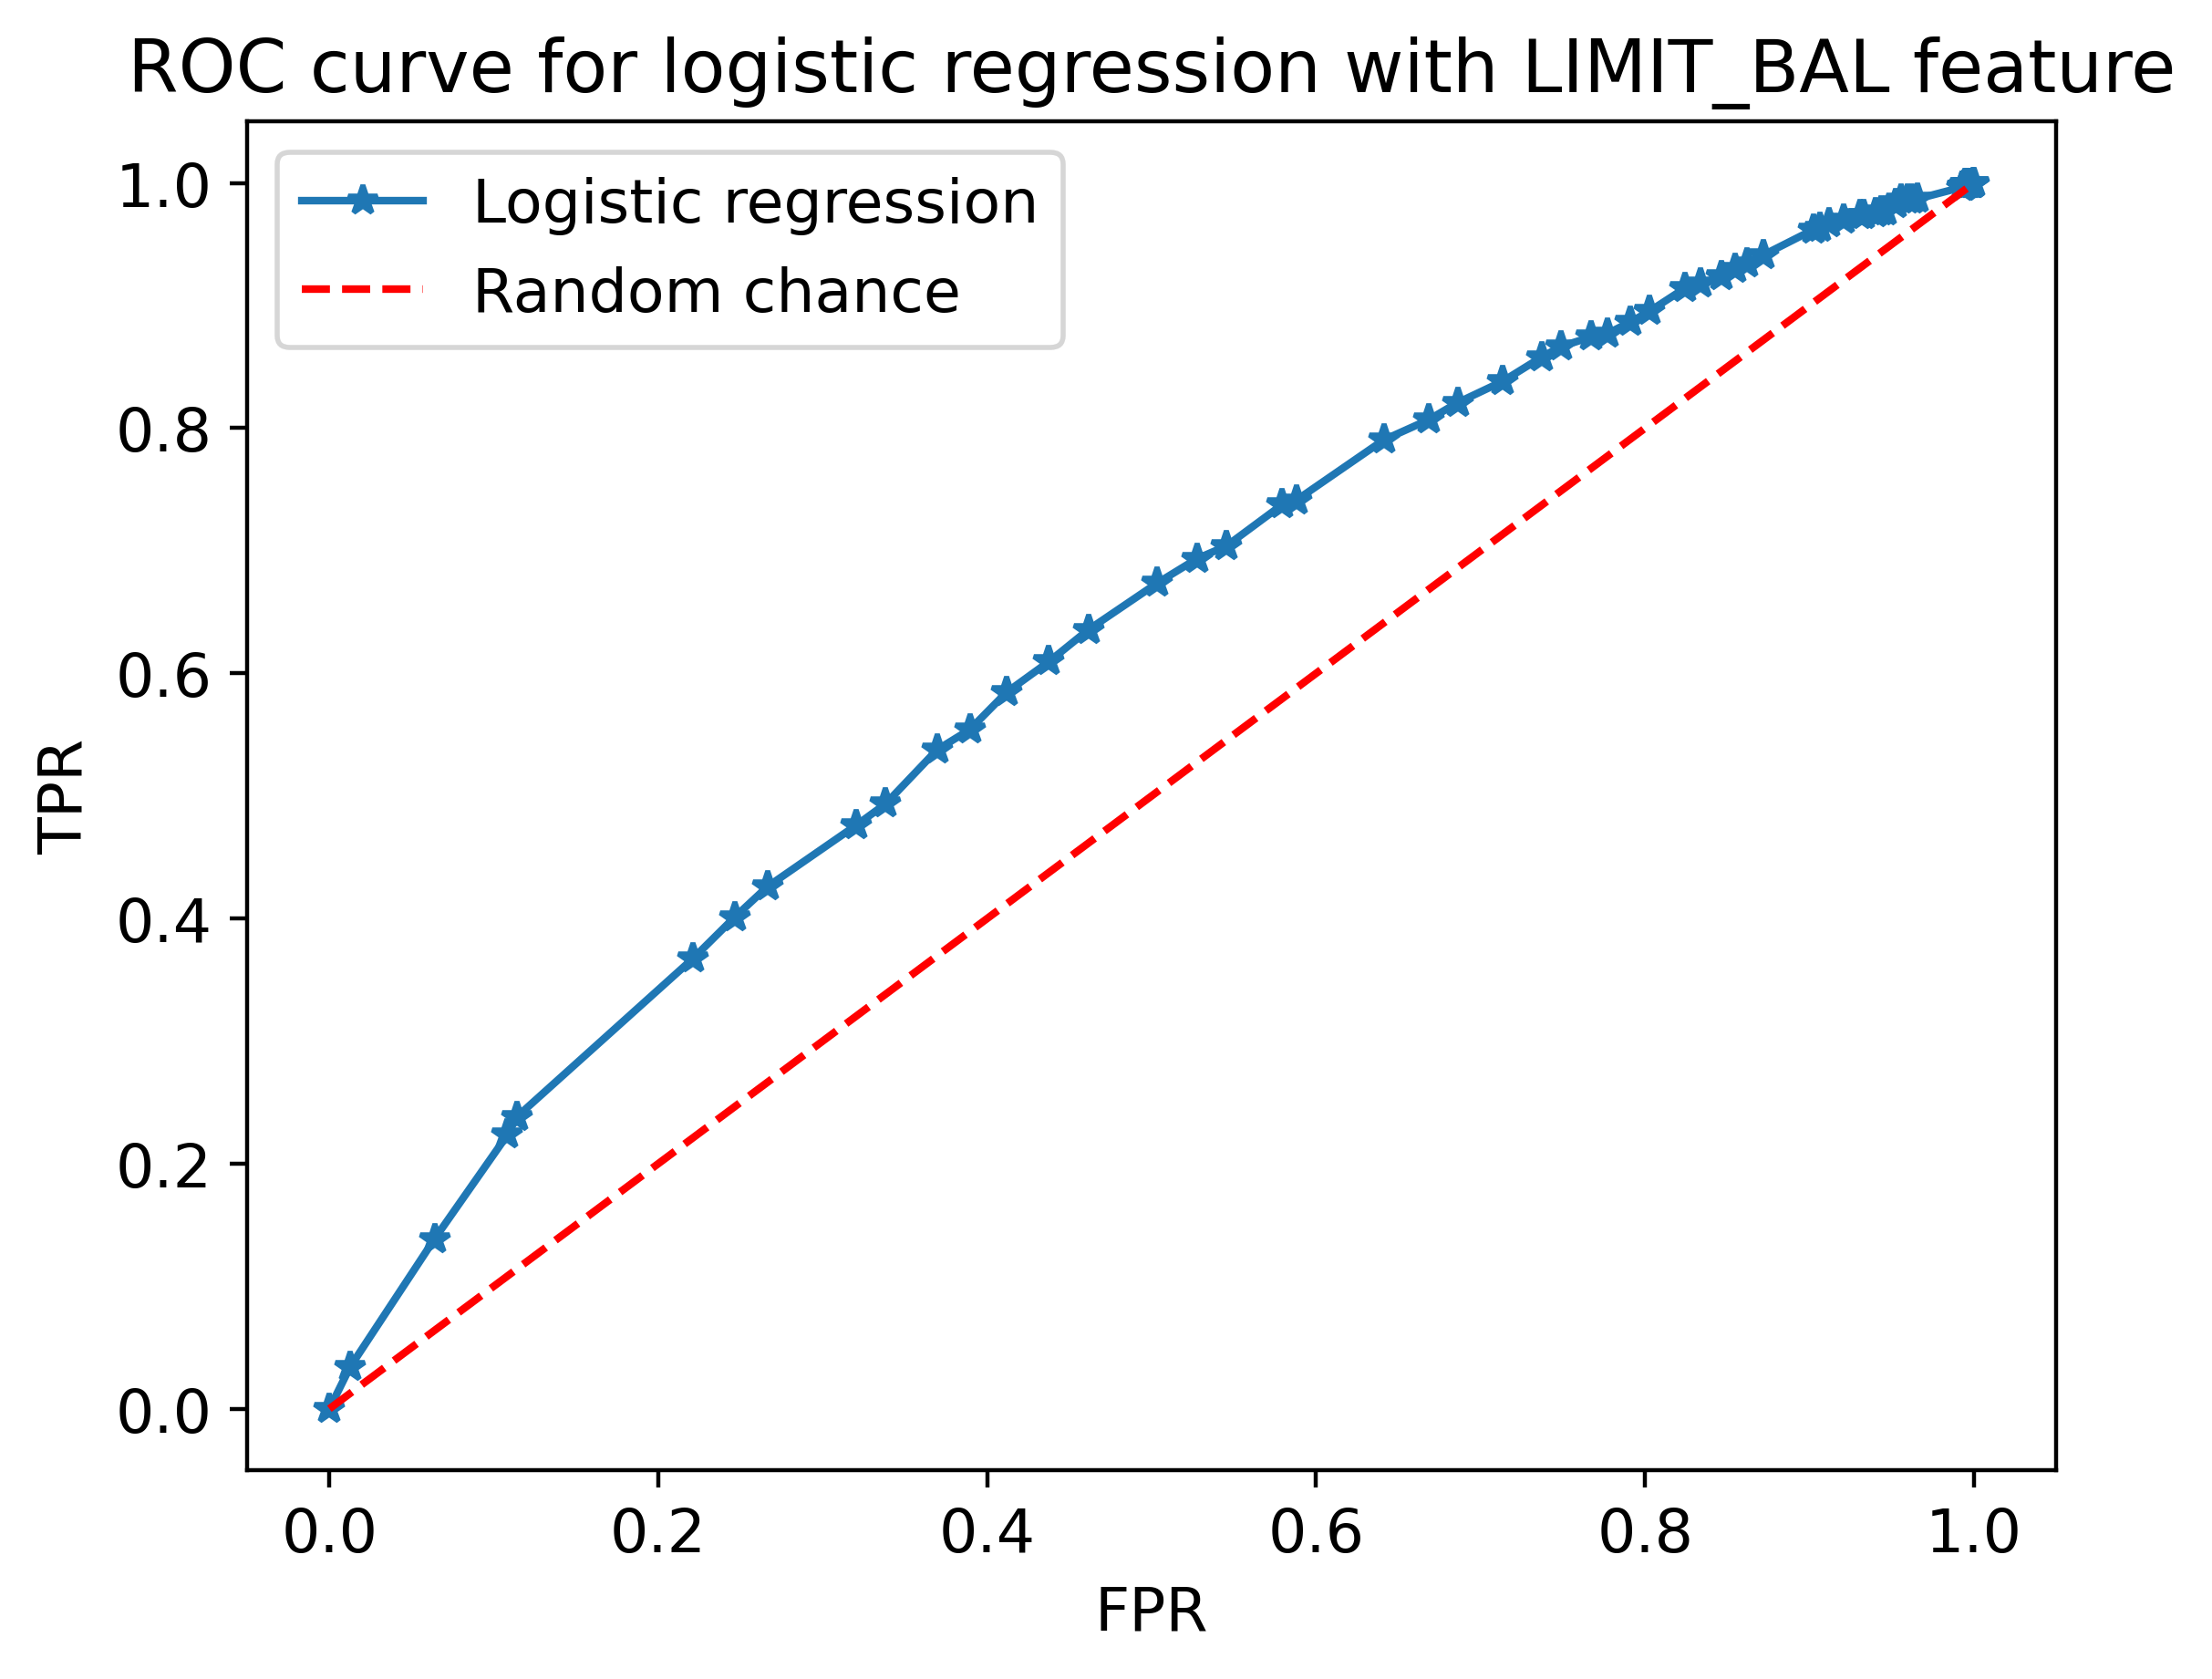

In [68]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [ ]:
#Precision Recall Curve
